In [39]:
import math 
import numpy as np 
import matplotlib.pyplot as plt

In [40]:
def lt(ri, r , phi):
    return 2*(np.sqrt(ri**2 - r**2*(math.cos(phi))**2))

def lw(ri,r0,r, phi):
    return 2*(np.sqrt(r0**2 - r**2*(math.cos(phi))**2)-np.sqrt(ri**2 - r**2*(math.cos(phi))**2))

In [41]:
a=0
b=2*np.pi
c=0
d=int(input("The radius of neutron beam: "))

The radius of neutron beam:  2


Inverse transform methond
PDF f(r)=2r/r_b^2
CDF F(r)=r^2/r_d^2
F^-1(u)=r_b * sqrt(u)
it follows the distribution of radius.

In [42]:
ri=int(input("The radius of traget: "))
r0=int(input("The radius of target container: "))

The radius of traget:  3
The radius of target container:  4


In [43]:

r=[]
phi=[]
N=100000
for i in range(N):
    phi.append(np.random.uniform(a,b))
    r.append(np.sqrt(np.random.uniform(0,1))*d)





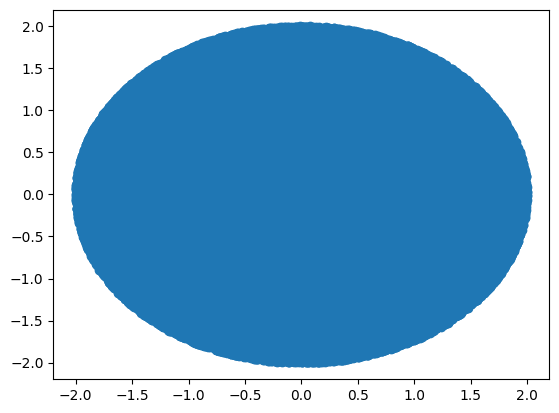

In [21]:
plt.plot(r*np.cos(phi),r*np.sin(phi),linestyle='None',marker='o')
plt.show()

In [46]:
sum_t = 0
sum_w = 0
for i in range(len(r)):
    sum_t = sum_t + lt(ri,r[i],phi[i])
    sum_w = sum_w + lw (ri,r0,r[i],phi[i]) 

In [47]:
integrated_t = np.pi*d**2* sum_t/N 
integrated_w = np.pi*d**2* sum_w/N 
average_t = integrated_t/np.pi/d**2

print("Integral of target length_inverse transform: "+ str(integrated_t))
print("Integral of container length_inverse transform: "+ str(integrated_w))
print(average_t)

Integral of target length_inverse transform: 70.97173024821979
Integral of container length_inverse transform: 26.336285203074183
5.647750844394384


Acceptance-rejection method

In [55]:
def radius(x,y):
    return np.sqrt(x**2 + y**2)

r=[]
phi=[]
N=1000000
for i in range(N):
    x=d*(-1 + 2*np.random.uniform(0,1))
    y=d*(-1 + 2*np.random.uniform(0,1))
    if radius(x,y)<=d:
        r.append(radius(x,y))
        phi.append(math.atan2(y,x))
print(len(r))

785694


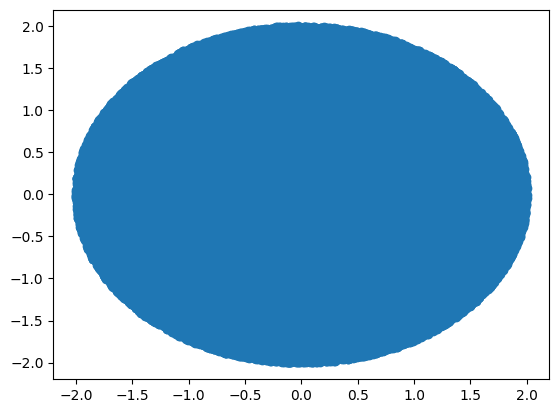

In [23]:
plt.plot(r*np.cos(phi),r*np.sin(phi),linestyle='None',marker='o')
plt.show()

In [56]:
sum_t = 0
sum_w = 0
for i in range(len(r)):
    sum_t = sum_t + lt(ri,r[i],phi[i])
    sum_w = sum_w + lw (ri,r0,r[i],phi[i]) 

In [57]:
integrated_t = np.pi*d**2* sum_t/len(r)
integrated_w = np.pi*d**2* sum_w/len(r)
average_t = integrated_t/np.pi/d**2
integrate_m=(d+d)*(d+d)*sum_t/N
print("Integral of target length_acceptance rejection: "+ str(integrated_t))
print("Integral of container length_acceptance rejection: "+ str(integrated_w))
print(integrate_m)

Integral of target length_acceptance rejection: 70.93331616508667
Integral of container length_acceptance rejection: 26.347176552425086
70.96003467837073


In [20]:
import sympy
from sympy.interactive import printing
printing.init_printing(use_latex="mathjax")

In [19]:
pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 3.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
x = sympy.Symbol("x")
y = sympy.Symbol("y")
sympy.integrate(x, (x, 0, 2), (y, 0, 2*np.pi))

12.5663706143592